In [62]:
%matplotlib inline

import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools

In [85]:
for each in itertools.combinations(range(1,3,1),2):
    print each

(1, 2)


In [90]:
execution_strategy = {
    "ignore_first_n_results": 10,
    "sample_size": 100,
    "type": "sequential",
    "knobs": [
        {"route_random_sigma": 0.0},
        {"route_random_sigma": 0.2},
        {"route_random_sigma": 0.4},
        {"route_random_sigma": 0.6},
    ]
}

In [98]:
a = []
for i in execution_strategy["knobs"]:
    a.append(i["route_random_sigma"])


In [99]:
a

[0.0, 0.2, 0.4, 0.6]

In [38]:
df1 = pd.read_csv("exp1.txt")
df2 = pd.read_csv("exp2.txt")
df1.columns = ["count", "overhead1"]
df2.columns = ["count", "overhead2"]
df = pd.concat([df1, df2["overhead2"]], axis=1)
stats.ttest_ind(df["overhead1"],df["overhead2"], equal_var= False)

Ttest_indResult(statistic=-1.5519982368981478, pvalue=0.12067847299233825)

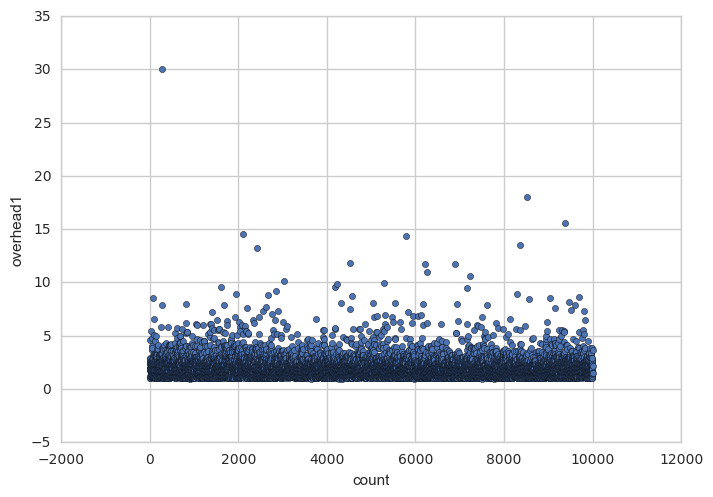

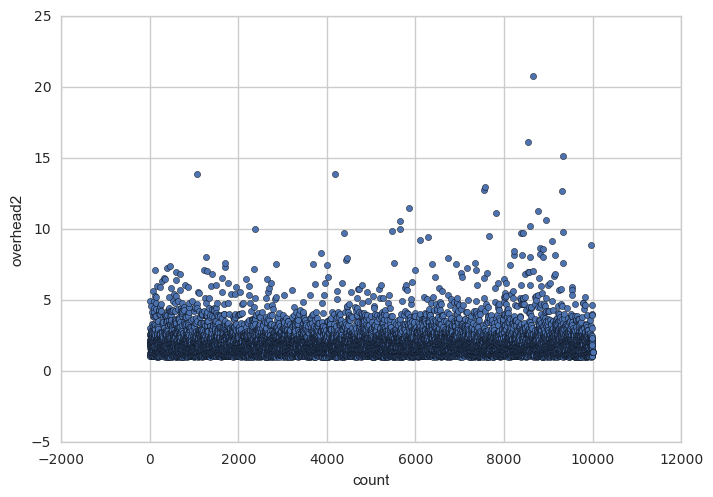

In [40]:
df.plot(kind='scatter',x='count',y='overhead1')
df.plot(kind='scatter',x='count',y='overhead2')

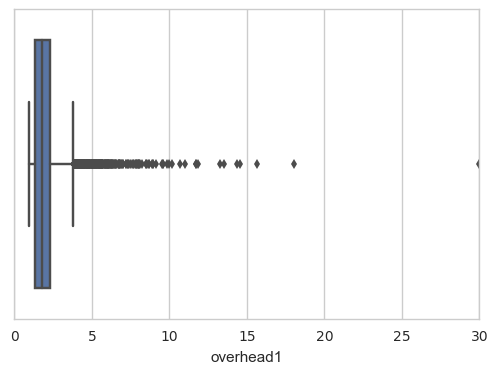

In [56]:
ax = sns.boxplot(x="overhead1", data= df)

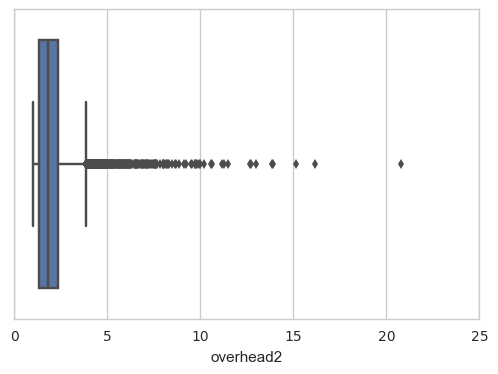

In [57]:
ax = sns.boxplot(x="overhead2", data= df)

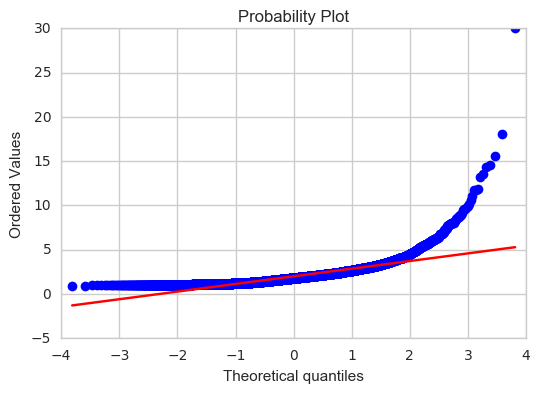

In [52]:
stats.probplot(df["overhead1"], dist=stats.norm, plot=plt)
pylab.show()

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0.97449696,   0.97870317,   0.98533408, ...,  15.15848365,
          16.14710301,  20.77342164])),
 (0.89004424542316929, 2.0265771103204271, 0.8473072332386129))

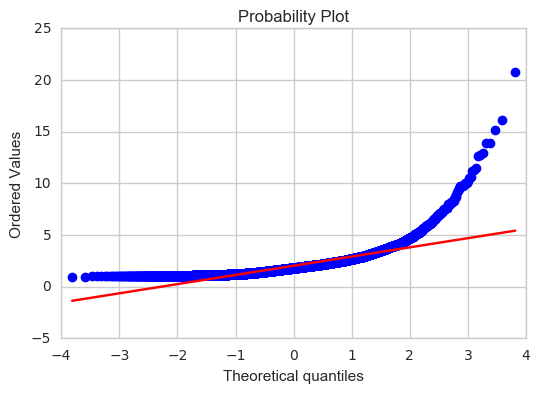

In [53]:
stats.probplot(df["overhead2"], dist="norm", plot=plt)

In [58]:
overhead1 = np.asarray(df["overhead1"])
overhead2 = np.asarray(df["overhead2"])

In [59]:
np.var(overhead1), np.var(overhead2)

(1.0721372537879432, 1.1026319390965296)

In [60]:
np.mean(overhead1), np.mean(overhead2)

(2.0036884947202687, 2.0265771103204275)